In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
global cycle 
cycle = np.pi / 66

读取数据

In [2]:
def DataProcessing(data):
    sheet1 = data.iloc[:,0:2]
    sheet2 = data.iloc[:,3:5]
    sheet2 = sheet2.rename(columns={'day.1': 'day', 'value.1': 'value'})
    sheet3 = data.iloc[:,6:8]
    sheet3 = sheet3.rename(columns={'day.2': 'day', 'value.2': 'value'})
    sheet4 = data.iloc[:,9:11]
    sheet4 = sheet4.rename(columns={'day.3': 'day', 'value.3': 'value'})
    sheet5 = data.iloc[:, 12:14]
    sheet5 = sheet5.rename(columns={'day.4': 'day', 'value.4': 'value'})
    output = sheet1._append(sheet2, ignore_index=True)
    output = output._append(sheet3, ignore_index=True)
    output = output._append(sheet4, ignore_index=True)
    output = output._append(sheet5, ignore_index=True)
    output = output.dropna(axis=0)
    output = output.sort_values(by='day')
    output.reset_index(drop=True,inplace=True)
    return output
def DataProcessing_1(data, counts = 1):
    sheet1 = data.iloc[:,0:2]
    sheet2 = data.iloc[:,3:5]
    sheet2 = sheet2.rename(columns={'day.1': 'day', 'value.1': 'value'})
    sheet3 = data.iloc[:,6:8]
    sheet3 = sheet3.rename(columns={'day.2': 'day', 'value.2': 'value'})
    sheet4 = data.iloc[:,9:11]
    sheet4 = sheet4.rename(columns={'day.3': 'day', 'value.3': 'value'})
    sheet5 = data.iloc[:,12:14]
    sheet5 = sheet5.rename(columns={'day.4': 'day', 'value.4': 'value'})
    if(counts==1):
        output = sheet1
    elif(counts==2):
        output = sheet2
    elif(counts==3):
        output = sheet3
    elif(counts==4):
        output = sheet4
    elif(counts==5):
        output = sheet5
    output = output.dropna(axis=0)
    output.reset_index(drop=True,inplace=True)
    return output.iloc[:, :]
def acquire_data(sheet='Sheet1', path = 'ini_SME/SME_all.xlsx', type=None):
    data=pd.read_excel(path, sheet_name=None, header=1)
    data1 = data[sheet]
    if(type):
        data = []
        for i in range(1, 6):
            data.append(DataProcessing_1(data1,i))
    else:
        data = DataProcessing(data1)
    return data

散点图

In [3]:
import matplotlib.pyplot as plt
def dot_plot(data):
    label_x = data.loc[:, 'day']
    label_y = data.loc[:, 'value']
    plt.scatter(label_x, label_y, c = 'g')
    plt.show()

数据读取

In [4]:
all_data=DataProcessing(pd.read_excel('ini_SME/SME_all.xlsx',sheet_name=None, header=1)['Sheet1'])
class_data=DataProcessing(pd.read_excel('ini_SME/SME_class.xlsx',sheet_name=None, header=1)['Sheet1'])
family_data=DataProcessing(pd.read_excel('ini_SME/SME_family.xlsx',sheet_name=None, header=1)['Sheet1'])
genu_data=DataProcessing(pd.read_excel('ini_SME/SME_genu.xlsx',sheet_name=None, header=1)['Sheet1'])
order_data=DataProcessing(pd.read_excel('ini_SME/SME_order.xlsx',sheet_name=None, header=1)['Sheet1'])
phylum_data=DataProcessing(pd.read_excel('ini_SME/SME_phylum.xlsx',sheet_name=None, header=1)['Sheet1'])
all_data_seq = acquire_data(path='ini_SME/SME_all.xlsx', type=1)
class_data_seq = acquire_data(path='ini_SME/SME_class.xlsx', type=1)
family_data_seq = acquire_data(path='ini_SME/SME_all.xlsx', type=1)
genu_data_seq = acquire_data(path='ini_SME/SME_all.xlsx', type=1)
order_data_seq = acquire_data(path='ini_SME/SME_all.xlsx', type=1)
phylum_data_seq = acquire_data(path='ini_SME/SME_all.xlsx', type=1)

In [5]:
all = pd.concat([all_data_seq[0], all_data_seq[1], all_data_seq[2],all_data_seq[3], all_data_seq[4]])
genu = pd.concat([genu_data_seq[0], genu_data_seq[1], genu_data_seq[2], genu_data_seq[3], genu_data_seq[4]])

数据分割，获取分割数据

In [6]:
def data_dividing(temp_data, type= None, slide =5):
    if(type):
        a_part = []
        b_part = []
        for i in range(0, slide):
            temp = temp_data[i]
            a_part.append(temp[temp['day'] < 70])
            b_part.append(temp[temp['day'] > 70].reset_index())
    else:
        a_part = temp_data[temp_data['day'] < 70]
        b_part = temp_data[temp_data['day'] > 70].reset_index()

    return a_part, b_part
front_all, rear_all = data_dividing(all_data_seq, 1)
front_class, rear_class = data_dividing(class_data_seq, 1)
front_family, rear_family = data_dividing(family_data_seq, 1)
front_genu, rear_genu = data_dividing(genu_data_seq, 1)
front_order, rear_order = data_dividing(order_data_seq, 1)
front_phylum, rear_phylum = data_dividing(phylum_data_seq, 1)
front_entire_genu, rear_entrie_genu = data_dividing(genu)

In [22]:
def func(a, b, e,  x):
    '''
    预测函数
    a:振幅
    b:相位
    e:常数项
    x:numpy array
    '''
    return a * (-np.sin(((2* cycle *x) + b)%np.pi) ) + e
def mse(a, b, e, x, y):
    '''
    预测函数
    a:振幅
    b:相位
    e:常数项
    x:numpy array
    '''
    y_pred = func(a, b, e, x)
    mse = np.power(y_pred - y, 2).mean()
    return mse
def diff( a, b, e, x, y):
    '''
    loss梯度求解
    ((c-y)-|asin(wx+b)|)^2 / len
    (c-y)^2-2(c-y)a|sin(wx+b)|+a|sin(wx+b)|^2
    '''
    diff_a = np.mean(2 * a * np.power(np.sin(((2* cycle *x) + b)%np.pi), 2)+2*(y-e)*(np.sin(((2* cycle *x) + b)% np.pi) + e) )
    # 
    diff_b = np.mean(np.cos(((2* cycle *x) + b)%np.pi) * a*a*2*np.sin(((2* cycle *x) + b)%np.pi) - 2 * (e-y) * a *np.cos(((2* cycle *x) + b)%np.pi))
    diff_e = np.mean(2*e - 2*e*a *np.sin(((2*cycle *x) + b)% np.pi)-4*y)# 2(e-y)为主要部分
    #print(f"a:{a}, b:{b}, c{e}, diff_a{diff_a}, diff_b{diff_b}, diff_c{diff_e}")
    return diff_a, diff_b, diff_e

def up_grade(a, b, e, diff_a, diff_b, diff_e, lr):
    '''更新'''
    a = a - lr * diff_a 
    b = b - lr * diff_b 
    e = e - lr * diff_e
    return a, b, e
# 一元一次函数图像
def plot(a, b, e, data):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    temp_x = np.arange(0, 180, 0.1)
    temp_y = func(a, b, e, temp_x)
    plt.plot(temp_x, temp_y)
    label_x = data.loc[:, 'day']
    label_y = data.loc[:, 'value']
    ax.set_xlabel('day')
    ax.set_ylabel('variation')
    plt.scatter(label_x, label_y, c = 'r')
    plt.figure(figsize=(200,100))
    plt.show()

In [8]:
import random
from tqdm import tqdm

def iteration(data, epoches = 100, batch_size = 10, a_range =0.05, b_range =2 * np.pi / 5, e_range = 0.1, lr=0.001):        
    a = a_range
    b = b_range
    e = e_range #初始值
    best_a = 0
    best_b = 0
    best_e = 0
    best_loss = 1000
    best_iter = 0
    batch_num = data.shape[0] // batch_size
    for i in tqdm(range(epoches)):
        for j in range(0, batch_num):
            calculate = np.array([])
            diff_as = np.array([]) # 微分保存
            diff_bs = np.array([])
            diff_es = np.array([])
            # 前传,后传
            batch_data = data.iloc[(j*batch_size) : (j+1)*batch_size-1, :]
            calculate = np.append(calculate, func(a, b, e, batch_data['day']))
            diff_a, diff_b, diff_e = diff(a, b, e, batch_data['day'], batch_data['value'])
            diff_as = np.append(diff_as, diff_a)
            diff_bs = np.append(diff_bs, diff_b)
            diff_es = np.append(diff_es, diff_e)
            # 数据处理
            loss = mse(a, b, e, data['day'], data['value'])
            a, b, e = up_grade(a, b, e, diff_as.mean(),diff_bs.mean(),diff_es.mean(),  lr)
            if(loss < best_loss):
                best_a = a
                best_b = b
                best_e = e
                best_loss = loss
                best_iter = i
            if(loss == np.nan):
                break
            # 更新参数
        if i % 100 == 0:
            print(f"iter:{i}, a:{a}, b:{b}, c:{e}, loss:{loss}, best_loss:{best_loss}, best_iter:{best_iter}")
    best_model = [best_a, best_b, best_e, best_loss, best_iter]
    return loss, a, b,e, best_model

In [9]:
def main_func(data, batch_size = 10, range_a = 0.15, range_b = 2 * np.pi / 5, range_e = 0.1, epoches = 100, lr = 0.001):
    loss, a, b, e, best_model = iteration(data, epoches,batch_size,  range_a, range_b, range_e, lr)
    print(f'final  a:{best_model[0]}, b:{best_model[1]}, c:{best_model[2]}, l2_loss:{best_model[3]}, best_iter:{best_model[4]}')
    plot(best_model[0], best_model[1], best_model[2], data)

同一组不同车间的情况

  2%|▎         | 5/200 [00:00<00:09, 20.94it/s]

iter:0, a:0.20019774569826929, b:-2.7773128290185678e-05, c:0.2507144108318494, loss:0.0025098458644701176, best_loss:0.0025098458644701176, best_iter:0


 52%|█████▏    | 104/200 [00:04<00:04, 22.15it/s]

iter:100, a:0.245463245305868, b:-0.001044890090748703, c:0.29540306475417205, loss:0.0029099665580144163, best_loss:0.002387219871964187, best_iter:20


100%|██████████| 200/200 [00:09<00:00, 21.71it/s]


final  a:0.20547871473882107, b:-0.0004303489992140834, c:0.2628836384482467, l2_loss:0.002387219871964187, best_iter:20


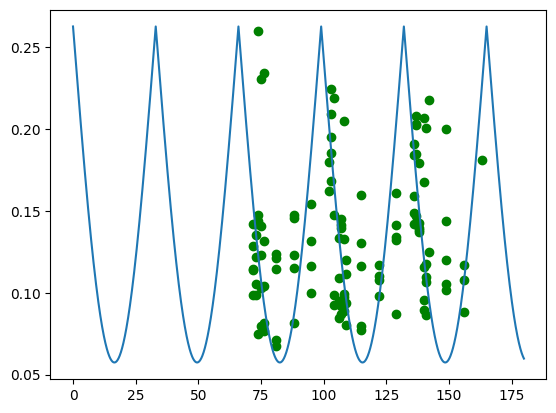

<Figure size 20000x10000 with 0 Axes>

In [10]:
main_func(rear_entrie_genu, batch_size = 8,range_a = 0.2, range_b = 0, range_e = 0.25, epoches = 200, lr = 0.0005)

  6%|▌         | 30/500 [00:00<00:03, 147.81it/s]

iter:0, a:0.20011929900473663, b:-1.2965110197830951e-06, c:0.2500662990736301, loss:0.001646701343543708, best_loss:0.00164608448854988, best_iter:0


 28%|██▊       | 141/500 [00:00<00:02, 154.67it/s]

iter:100, a:0.21222670449100758, b:-0.00016102140307895955, c:0.2560003331575689, loss:0.0017994145468422222, best_loss:0.00164608448854988, best_iter:0


 47%|████▋     | 237/500 [00:01<00:01, 154.84it/s]

iter:200, a:0.224363788455199, b:-0.00041604588270266593, c:0.2608597668667466, loss:0.00197732910433186, best_loss:0.00164608448854988, best_iter:0


 67%|██████▋   | 333/500 [00:02<00:01, 153.42it/s]

iter:300, a:0.2362092575980231, b:-0.0008063514829503217, c:0.2649736588472575, loss:0.0021865479563512266, best_loss:0.00164608448854988, best_iter:0


 86%|████████▌ | 429/500 [00:02<00:00, 148.42it/s]

iter:400, a:0.24758901057926974, b:-0.0013578794654362156, c:0.26855499332399174, loss:0.00242751198183626, best_loss:0.00164608448854988, best_iter:0


100%|██████████| 500/500 [00:03<00:00, 152.30it/s]


final  a:0.20003245931596997, b:-1.3577729267164217e-06, c:0.25008014906384285, l2_loss:0.00164608448854988, best_iter:0


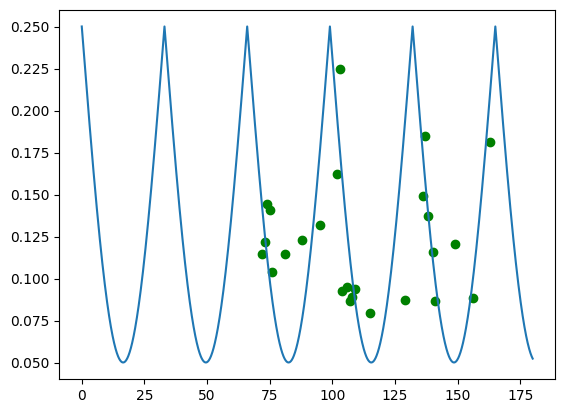

<Figure size 20000x10000 with 0 Axes>

  3%|▎         | 15/500 [00:00<00:03, 149.09it/s]

iter:0, a:0.20013072924081327, b:-2.6979873599412055e-06, c:0.2500614307124705, loss:0.0017223777270903146, best_loss:0.0017214603575027652, best_iter:0


 25%|██▌       | 126/500 [00:00<00:02, 152.43it/s]

iter:100, a:0.21319717107421943, b:-0.0003175884386231223, c:0.2556216187447375, loss:0.0019077010461415777, best_loss:0.0017214603575027652, best_iter:0


 48%|████▊     | 239/500 [00:01<00:01, 156.65it/s]

iter:200, a:0.22601354287808093, b:-0.0007458083296238507, c:0.260273877103829, loss:0.0021405948695449456, best_loss:0.0017214603575027652, best_iter:0


 67%|██████▋   | 337/500 [00:02<00:01, 160.11it/s]

iter:300, a:0.2383518235968714, b:-0.001313697662854259, c:0.264285628397838, loss:0.002420168991812805, best_loss:0.0017214603575027652, best_iter:0


 87%|████████▋ | 435/500 [00:02<00:00, 158.51it/s]

iter:400, a:0.250099244196702, b:-0.0020374363316741344, c:0.26783059247851343, loss:0.002740623277796183, best_loss:0.0017214603575027652, best_iter:0


100%|██████████| 500/500 [00:03<00:00, 156.15it/s]

final  a:0.20006648435011423, b:-2.973280609020085e-06, c:0.2500219732045135, l2_loss:0.0017214603575027652, best_iter:0


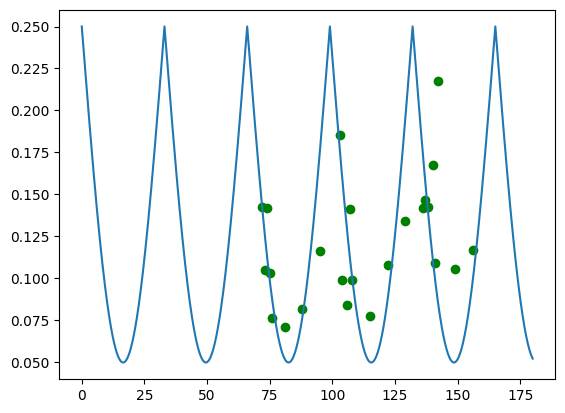

<Figure size 20000x10000 with 0 Axes>

  3%|▎         | 15/500 [00:00<00:03, 143.71it/s]

iter:0, a:0.20002565909890996, b:-7.125353554636045e-06, c:0.2502557943204581, loss:0.00272445342000077, best_loss:0.00272445342000077, best_iter:0


 29%|██▉       | 145/500 [00:00<00:02, 158.04it/s]

iter:100, a:0.20683295873828125, b:-0.00044592410153112617, c:0.27199185878168797, loss:0.0022735420674017625, best_loss:0.0022734454989254377, best_iter:100


 45%|████▌     | 225/500 [00:01<00:01, 154.27it/s]

iter:200, a:0.21960073798487487, b:-0.0005379448401998261, c:0.28798055803332384, loss:0.0024184329202909713, best_loss:0.00227313918770232, best_iter:104


 64%|██████▍   | 321/500 [00:02<00:01, 156.11it/s]

iter:300, a:0.23568861505224606, b:-0.00048724472476583585, c:0.30026193863476586, loss:0.002690304507511607, best_loss:0.00227313918770232, best_iter:104


 83%|████████▎ | 417/500 [00:02<00:00, 155.84it/s]

iter:400, a:0.25344227338500136, b:-0.0004300301918867979, c:0.31014891896893915, loss:0.003005653704968185, best_loss:0.00227313918770232, best_iter:104


100%|██████████| 500/500 [00:03<00:00, 155.62it/s]


final  a:0.2072006797580722, b:-0.00045089017981741157, c:0.27262574606360224, l2_loss:0.00227313918770232, best_iter:104


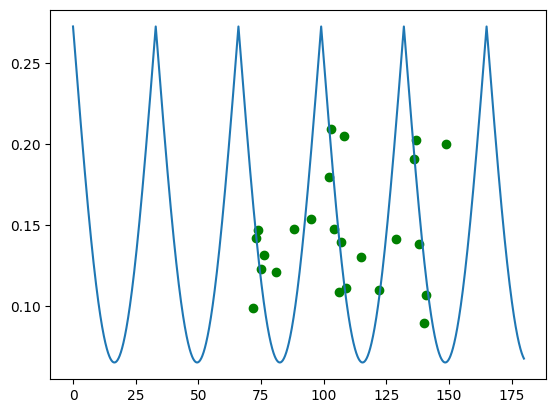

<Figure size 20000x10000 with 0 Axes>

  3%|▎         | 16/500 [00:00<00:03, 155.17it/s]

iter:0, a:0.20011465730751712, b:8.404383924968229e-08, c:0.2500712845114457, loss:0.0025415077532019163, best_loss:0.002539142252252563, best_iter:0


 29%|██▉       | 145/500 [00:00<00:02, 154.27it/s]

iter:100, a:0.21185641415506268, b:-4.827296523782128e-06, c:0.25643069160327486, loss:0.0027184477204037103, best_loss:0.002539142252252563, best_iter:0


 48%|████▊     | 239/500 [00:01<00:01, 145.41it/s]

iter:200, a:0.22376315404096334, b:-6.871851237518388e-05, c:0.26160672779863486, loss:0.002949022293103378, best_loss:0.002539142252252563, best_iter:0


 64%|██████▎   | 318/500 [00:02<00:01, 153.96it/s]

iter:300, a:0.2354514775713817, b:-0.00022810234511567846, c:0.2659669040722306, loss:0.0032278573618510107, best_loss:0.002539142252252563, best_iter:0


 87%|████████▋ | 433/500 [00:02<00:00, 158.13it/s]

iter:400, a:0.24671004175018868, b:-0.0005068684980213756, c:0.2697483383039345, loss:0.0035484279233191332, best_loss:0.002539142252252563, best_iter:0


100%|██████████| 500/500 [00:03<00:00, 154.65it/s]


final  a:0.20008057689872774, b:2.5338678359590034e-06, c:0.2499803275368262, l2_loss:0.002539142252252563, best_iter:0


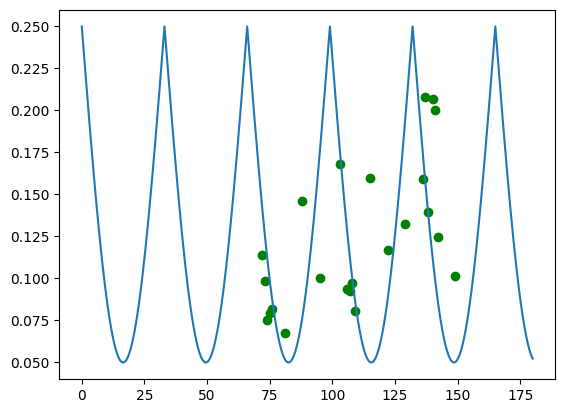

<Figure size 20000x10000 with 0 Axes>

  3%|▎         | 15/500 [00:00<00:03, 145.45it/s]

iter:0, a:0.19994162182524242, b:-2.2676368552746763e-05, c:0.2504566269697697, loss:0.004054367689984493, best_loss:0.004054367689984493, best_iter:0


 26%|██▌       | 128/500 [00:00<00:02, 157.02it/s]

iter:100, a:0.20252591227429878, b:-0.0015335984009677767, c:0.28895502604985507, loss:0.002375466220754938, best_loss:0.002375466220754938, best_iter:100


 41%|████▏     | 207/500 [00:01<00:01, 155.40it/s]


iter:200, a:0.21734598284173065, b:-0.0020621908558627997, c:0.31678575008311904, loss:0.002672980393935607, best_loss:0.0023682787658059878, best_iter:110


KeyboardInterrupt: 

In [11]:
main_func(rear_genu[0],batch_size = 10,range_a = 0.2, range_b = 0, range_e = 0.25, epoches = 500, lr = 0.001)
main_func(rear_genu[1],batch_size = 10,range_a = 0.2, range_b = 0, range_e = 0.25, epoches = 500, lr = 0.001)
main_func(rear_genu[2],batch_size = 10,range_a = 0.2, range_b = 0, range_e = 0.25, epoches = 500, lr = 0.001)
main_func(rear_genu[3],batch_size = 10,range_a = 0.2, range_b = 0, range_e = 0.25, epoches = 500, lr = 0.001)
main_func(rear_genu[4],batch_size = 10,range_a = 0.2, range_b = 0, range_e = 0.25, epoches = 500, lr = 0.001)

  1%|          | 6/500 [00:00<00:18, 26.36it/s]

iter:0, a:0.1502349513350882, b:2.343854099635091e-06, c:0.14938305504250185, loss:0.000569156172539549, best_loss:0.000569156172539549, best_iter:0


 22%|██▏       | 108/500 [00:03<00:14, 26.75it/s]

iter:100, a:0.15167086578350356, b:0.00013092854575121987, c:0.10918351932417077, loss:0.0008057657968555919, best_loss:0.00029062285549777314, best_iter:27


 41%|████▏     | 207/500 [00:06<00:09, 30.86it/s]

iter:200, a:0.1358779448738392, b:0.00013279110932652437, c:0.09247061442353091, loss:0.001032940288459383, best_loss:0.00029062285549777314, best_iter:27


 61%|██████    | 305/500 [00:10<00:06, 30.34it/s]

iter:300, a:0.11947771238025098, b:8.89332296705772e-05, c:0.08513305251304501, loss:0.0007727459082760111, best_loss:0.00029062285549777314, best_iter:27


 82%|████████▏ | 408/500 [00:13<00:02, 31.61it/s]

iter:400, a:0.10648911014014505, b:3.195445470911134e-05, c:0.08171238975493908, loss:0.0005039492199396457, best_loss:0.00029062285549777314, best_iter:27


100%|██████████| 500/500 [00:16<00:00, 30.45it/s]


final  a:0.1543336849703553, b:5.770092995886451e-05, c:0.13485206680104164, l2_loss:0.00029062285549777314, best_iter:27


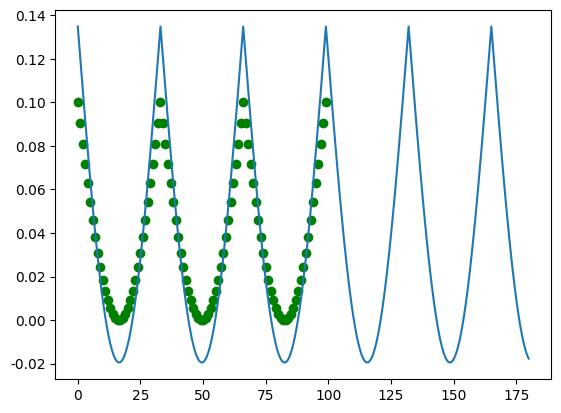

<Figure size 20000x10000 with 0 Axes>

In [ ]:
test_data = []
for i in range(0, 100):
    test_data.append([i, func(0.1, 0, 0.1, i)])
test_df = pd.DataFrame(test_data,columns=['day','value'],dtype=float)
test_df
main_func(test_df, 20, 0.15, 0, 0.15, 500, 0.001)

best  a:0.15878361400195018, b:-4.813585287822511e-05, c:0, d:1, e:0.2511248320753137, l2_loss:0.0027643742943978273
best  a:0.1822053115826124, b:-0.00019066993606999016, c:0, d:1, e:0.2560954657576097, l2_loss:0.005557541955081409
best  a:0.15, b:0, c:1, d:1, e:0.25, l2_loss:0.003428145607542311

In [ ]:
mse(0.1, 0, 0.1, test_df['day'], test_df['value'])

0.0

In [14]:
import seaborn as sns
sns.set_theme(context='notebook', #设置缩放
        style='darkgrid', #设置背景风格
        palette='deep', #设置colormap
        font='sans-serif', font_scale=1, color_codes=True, rc=None)



100%|██████████| 5/5 [00:00<00:00, 141.24it/s]

iter:0, a:0.120069824977589, b:-6.480687813591214e-07, c:0.2002004359582717, loss:0.0010001019042763441, best_loss:0.0009994895731576924, best_iter:0
final  a:0.12001146802609074, b:-8.070324094665411e-07, c:0.20014589581913328, l2_loss:0.0009994895731576924, best_iter:0


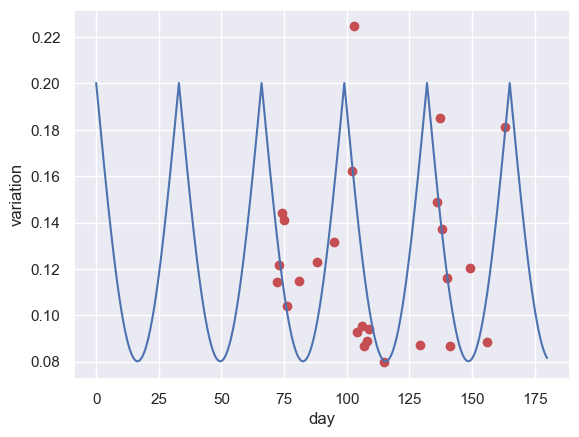

<Figure size 20000x10000 with 0 Axes>

In [25]:
main_func(rear_genu[0],batch_size = 10,range_a = 0.12, range_b = 0, range_e = 0.2, epoches = 5, lr = 0.001)